# Customer Segmentation using K-means Algorithm

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
#!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer

# To load the excel file

In [2]:
df=pd.read_excel("ecom customer_data.xlsx")

# Data Cleaning and Summarization

In [3]:
#To read the top 5 data in the dataset
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [4]:
#To view the no of rows and columns
df.shape

(30000, 38)

There are 30000 Rows and 39 Columns

In [5]:
#To view the overall information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

From the info,it shows that there are 1 object column and other columns are in int datatype

In [6]:
#To view any duplicates in the data
df.duplicated().sum()

0

There is no duplicate values in the data

In [7]:
#To view any null values in the data
df.isnull().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [8]:
#To impute the null values with the mode (most frequent value)
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)

In [9]:
#To view any null values in the data after imputing the null values with mode(most frequent value)
df.isnull().sum()

Cust_ID                   0
Gender                    0
Orders                    0
Jordan                    0
Gatorade                  0
Samsung                   0
Asus                      0
Udis                      0
Mondelez International    0
Wrangler                  0
Vans                      0
Fila                      0
Brooks                    0
H&M                       0
Dairy Queen               0
Fendi                     0
Hewlett Packard           0
Pladis                    0
Asics                     0
Siemens                   0
J.M. Smucker              0
Pop Chips                 0
Juniper                   0
Huawei                    0
Compaq                    0
IBM                       0
Burberry                  0
Mi                        0
LG                        0
Dior                      0
Scabal                    0
Tommy Hilfiger            0
Hollister                 0
Forever 21                0
Colavita                  0
Microsoft           

In [10]:
#To read the top 5 data in the dataset after imputing null values
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,F,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [11]:
#To view summary of the numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cust_ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
Orders,30000.0,4.169800,3.590311,0.0,1.00,4.0,7.00,12.0
Jordan,30000.0,0.267433,0.804778,0.0,0.00,0.0,0.00,24.0
Gatorade,30000.0,0.252333,0.705368,0.0,0.00,0.0,0.00,15.0
Samsung,30000.0,0.222933,0.917494,0.0,0.00,0.0,0.00,27.0
Asus,30000.0,0.161333,0.740038,0.0,0.00,0.0,0.00,17.0
Udis,30000.0,0.143533,0.641258,0.0,0.00,0.0,0.00,14.0
Mondelez International,30000.0,0.139767,0.525840,0.0,0.00,0.0,0.00,31.0
Wrangler,30000.0,0.106933,0.515921,0.0,0.00,0.0,0.00,9.0
Vans,30000.0,0.111433,0.547990,0.0,0.00,0.0,0.00,16.0


In [12]:
#To view summary of the categorical data
df.describe(include=object).T

,count,unique,top,freq
Gender,30000,2,F,24778


# Data Visualization

In [13]:
#To view the correlation matrix
df_corr=df.corr(numeric_only=True)
df

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,F,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,29997,M,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,29998,M,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,29999,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


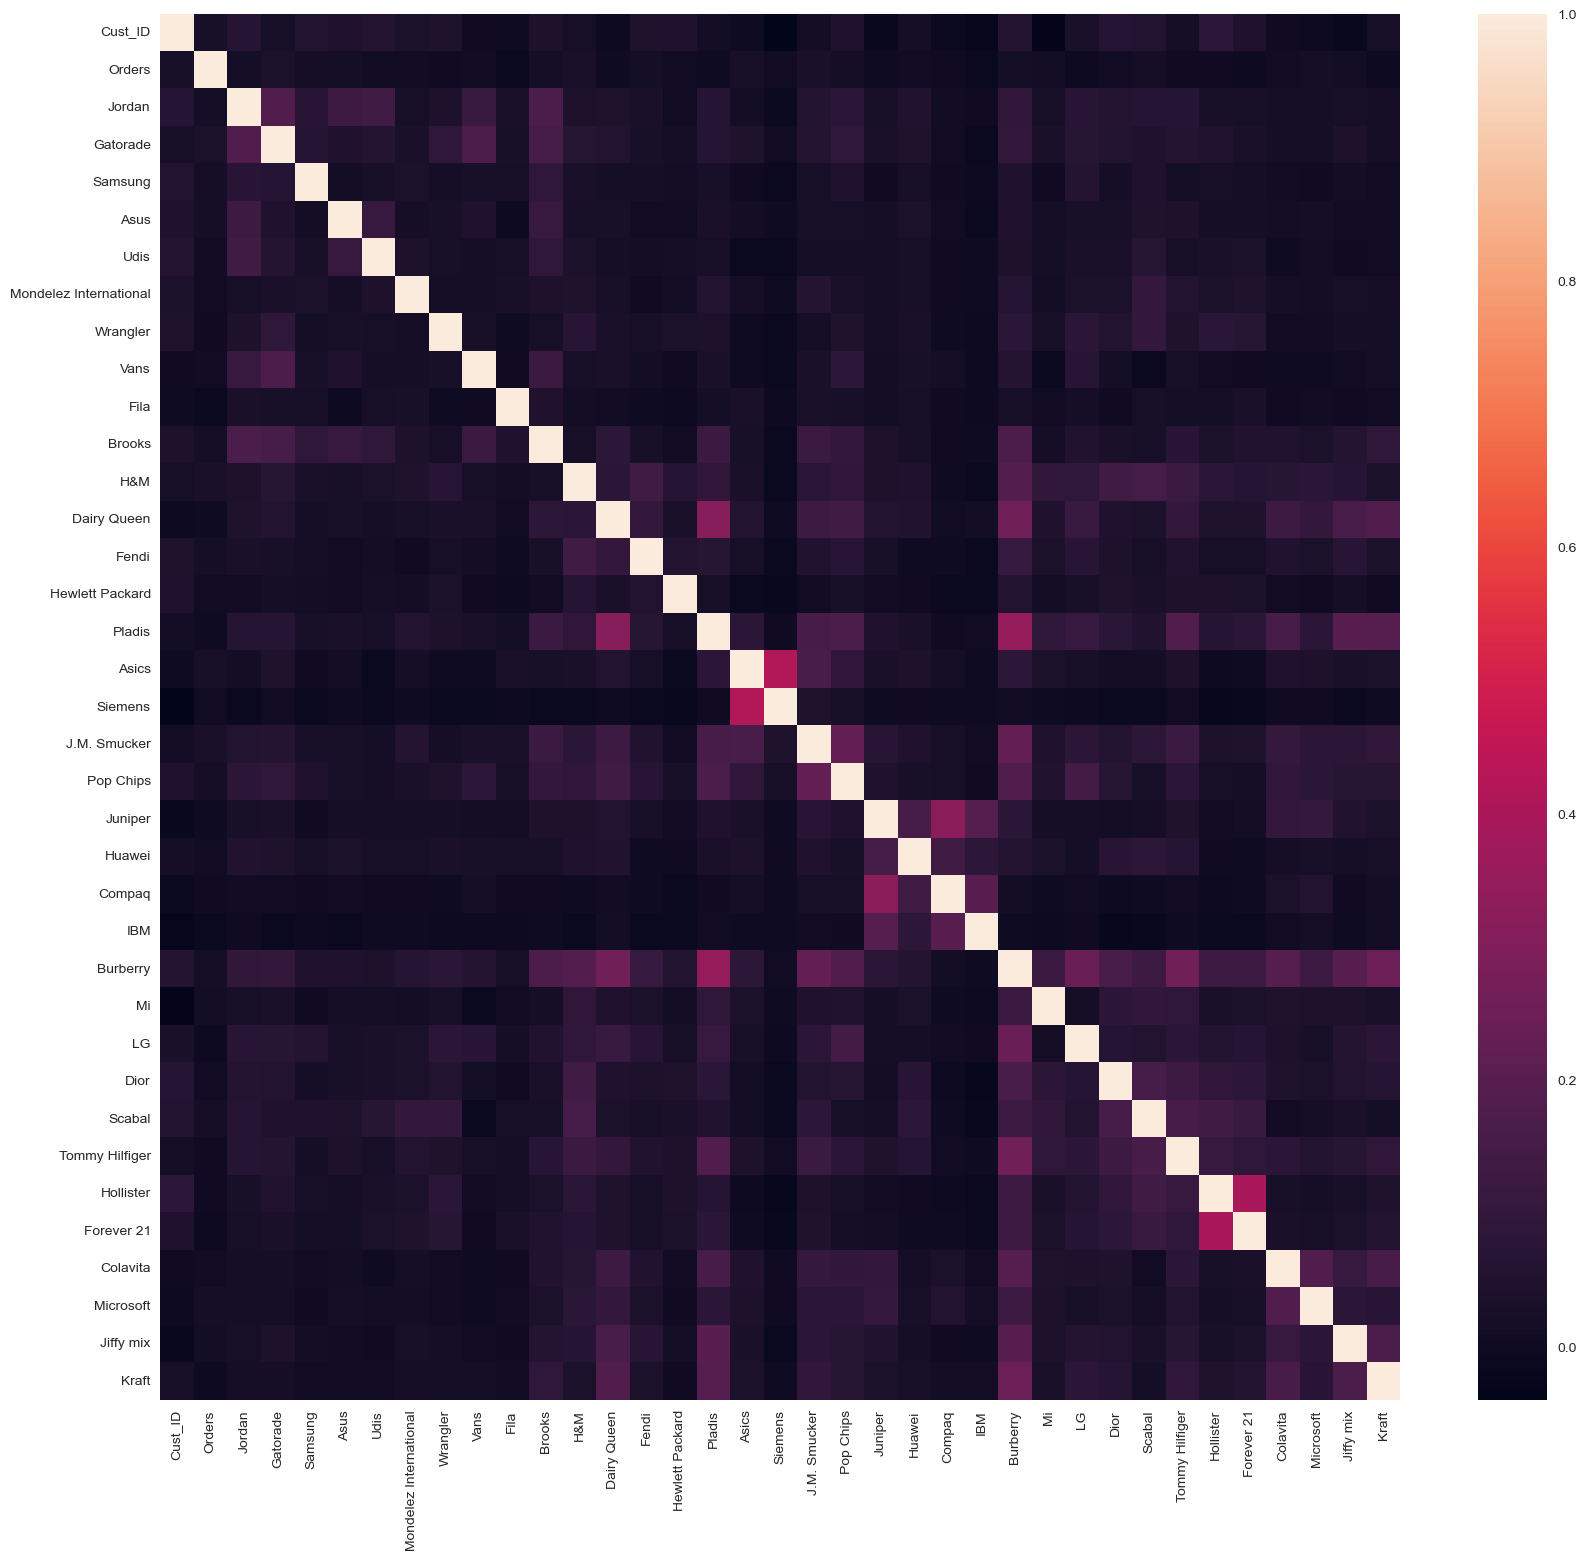

In [14]:
#To view the heat map for graphical Representation of correlation matrix
plt.figure(figsize=(20,18))
sns.heatmap(df_corr,cbar=True)
plt.show()

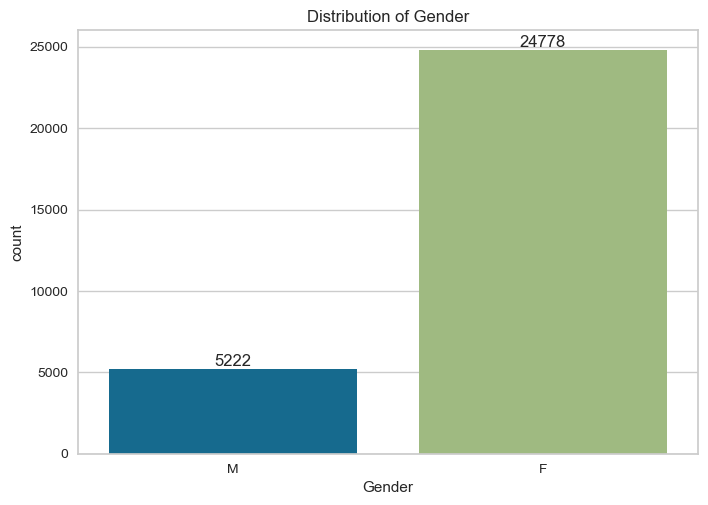

In [15]:
#To view the gender count graphically
a=sns.countplot(data=df,x="Gender")
for i in a.containers:
    a.bar_label(i,)
plt.title("Distribution of Gender")
plt.show()

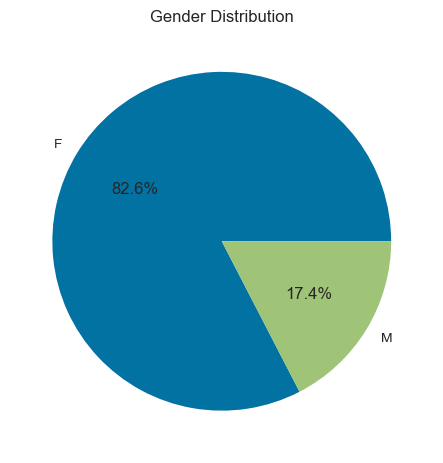

In [16]:
#To plot pie chart to view in percentage of the distribution 
gender_distribution= df['Gender'].value_counts()
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

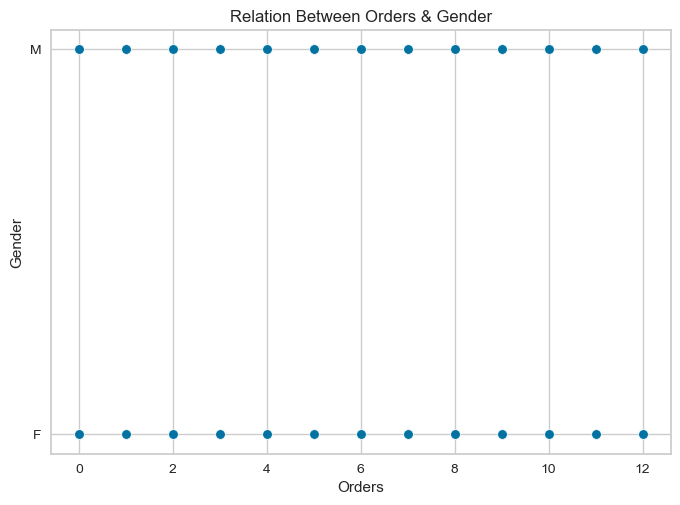

In [17]:
#To plot the Scatter plot to view the relation between the 2 columns
sns.scatterplot(data=df,x="Orders",y="Gender")
plt.title("Relation Between Orders & Gender")
plt.show()

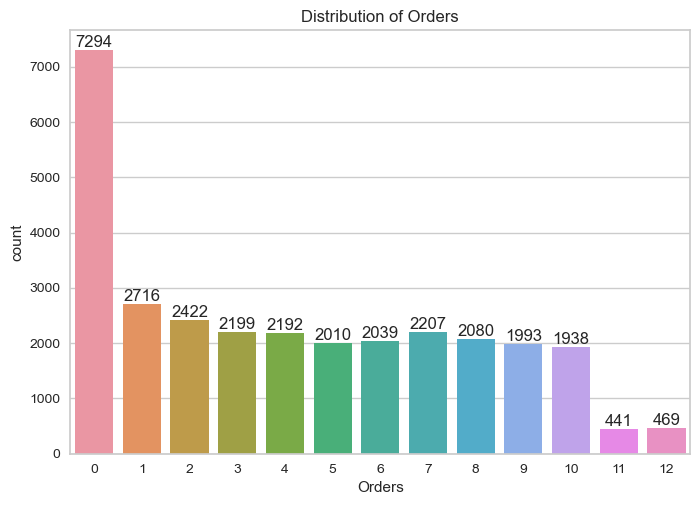

In [18]:
#To view the order count graphically
b=sns.countplot(data=df,x="Orders")
for i in b.containers:
    b.bar_label(i,)
plt.title("Distribution of Orders")
plt.show()

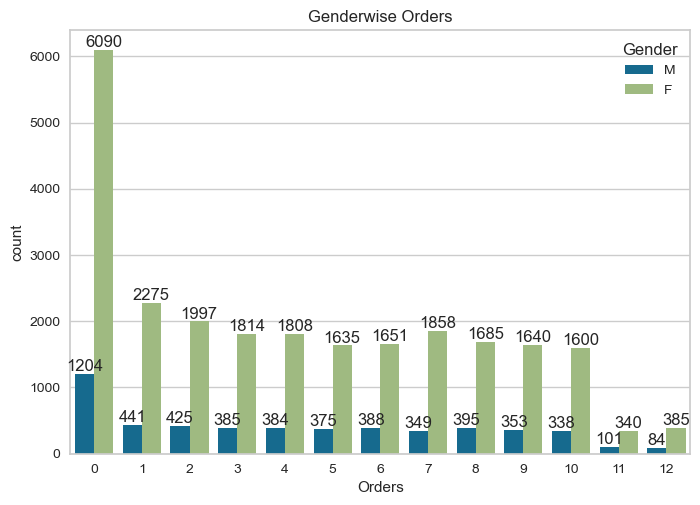

In [19]:
#To view the genderwise no of orders graphically
c=sns.countplot(data=df,x="Orders",hue="Gender")
for i in c.containers:
    c.bar_label(i,)
plt.title("Genderwise Orders")
plt.show()

In [20]:
#To view the column names 
df.columns

Index(['Cust_ID', 'Gender', 'Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus',
       'Udis', 'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks',
       'H&M', 'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics',
       'Siemens', 'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq',
       'IBM', 'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger',
       'Hollister', 'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix',
       'Kraft'],
      dtype='object')

In [21]:
#Use of groupby to view the sum of brands based on gender
grp_df=df.groupby("Gender")[['Jordan', 'Gatorade', 'Samsung', 'Asus',
       'Udis', 'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks',
       'H&M', 'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics',
       'Siemens', 'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq',
       'IBM', 'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger',
       'Hollister', 'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix',
       'Kraft']].sum().reset_index()
grp_df

,Gender,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,F,6375,5228,5591,4792,4125,3733,3161,1888,2234,...,2833,7321,10726,4325,2101,1582,4760,2936,2248,1777
1,M,1648,2342,1097,48,181,460,47,1455,594,...,243,813,376,444,229,138,1006,555,393,350


In [22]:
#use of melt function to reshapes the DataFrame into a long table with one row for each each c
melted_df_gen = grp_df.melt(id_vars='Gender', var_name='Brand', value_name='Total_Sum')

In [23]:
#Dataframe after melting
melted_df_gen.head

<bound method NDFrame.head of    Gender      Brand  Total_Sum
0       F     Jordan       6375
1       M     Jordan       1648
2       F   Gatorade       5228
3       M   Gatorade       2342
4       F    Samsung       5591
..    ...        ...        ...
65      M  Microsoft        555
66      F  Jiffy mix       2248
67      M  Jiffy mix        393
68      F      Kraft       1777
69      M      Kraft        350

[70 rows x 3 columns]>

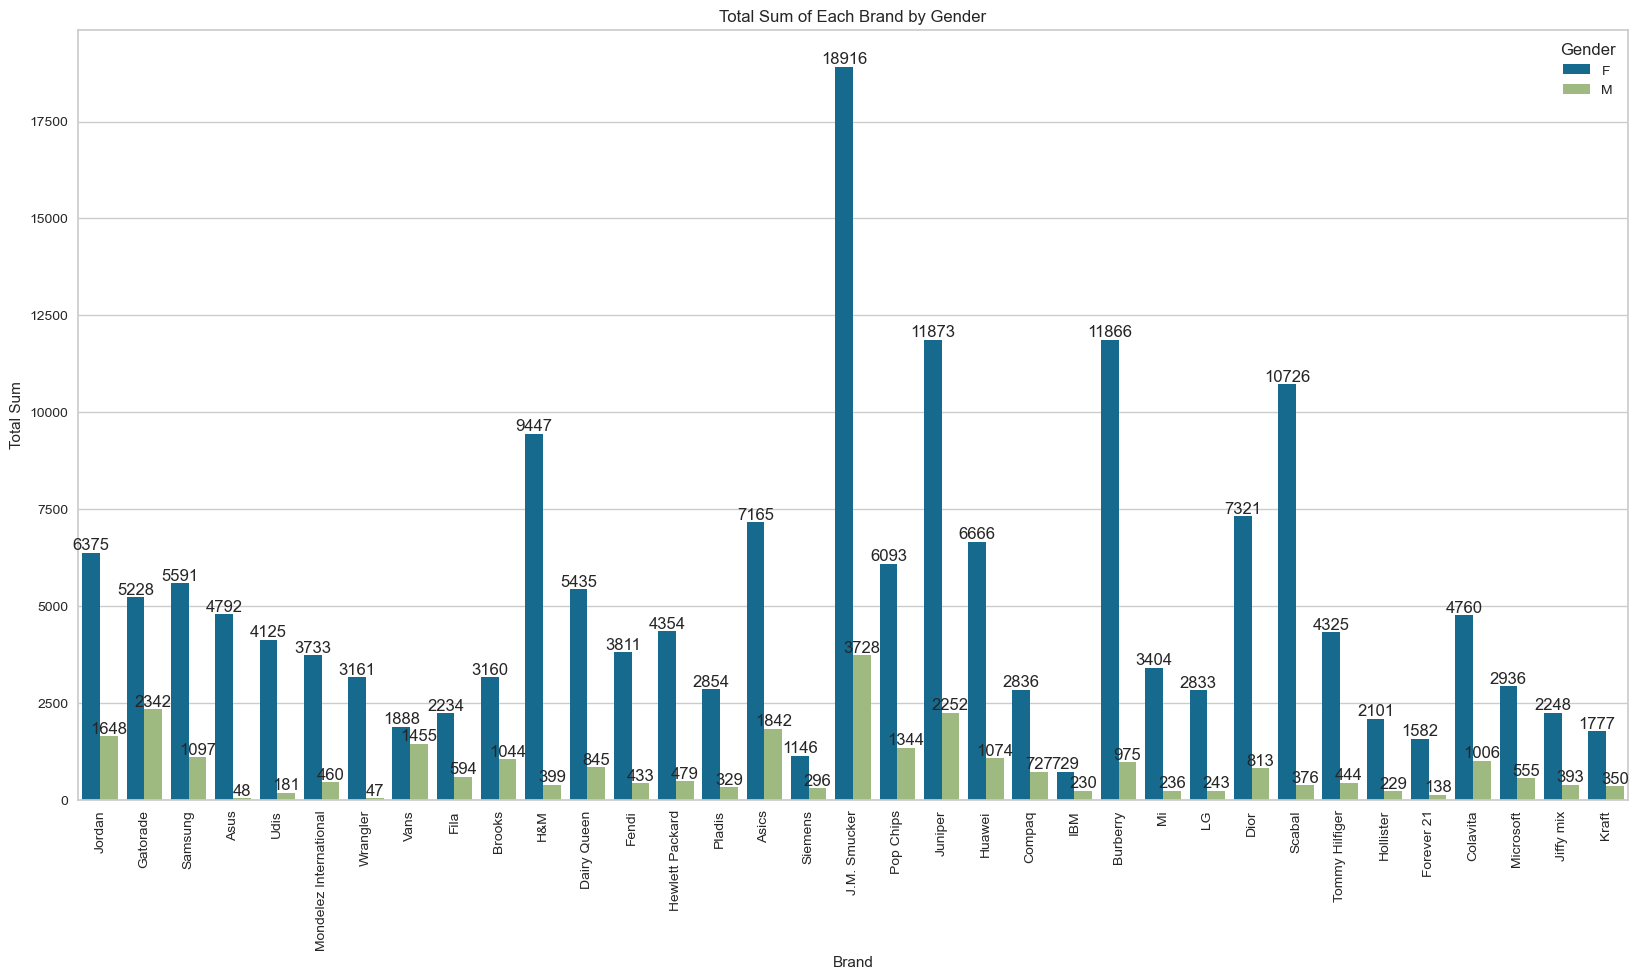

In [24]:
plt.figure(figsize=(20,10))
xy=sns.barplot(data=melted_df_gen, x='Brand', y='Total_Sum', hue='Gender')
for i in xy.containers:
    xy.bar_label(i,)
plt.title('Total Sum of Each Brand by Gender')
plt.xlabel('Brand')
plt.ylabel('Total Sum')
plt.xticks(rotation=90)
plt.show()

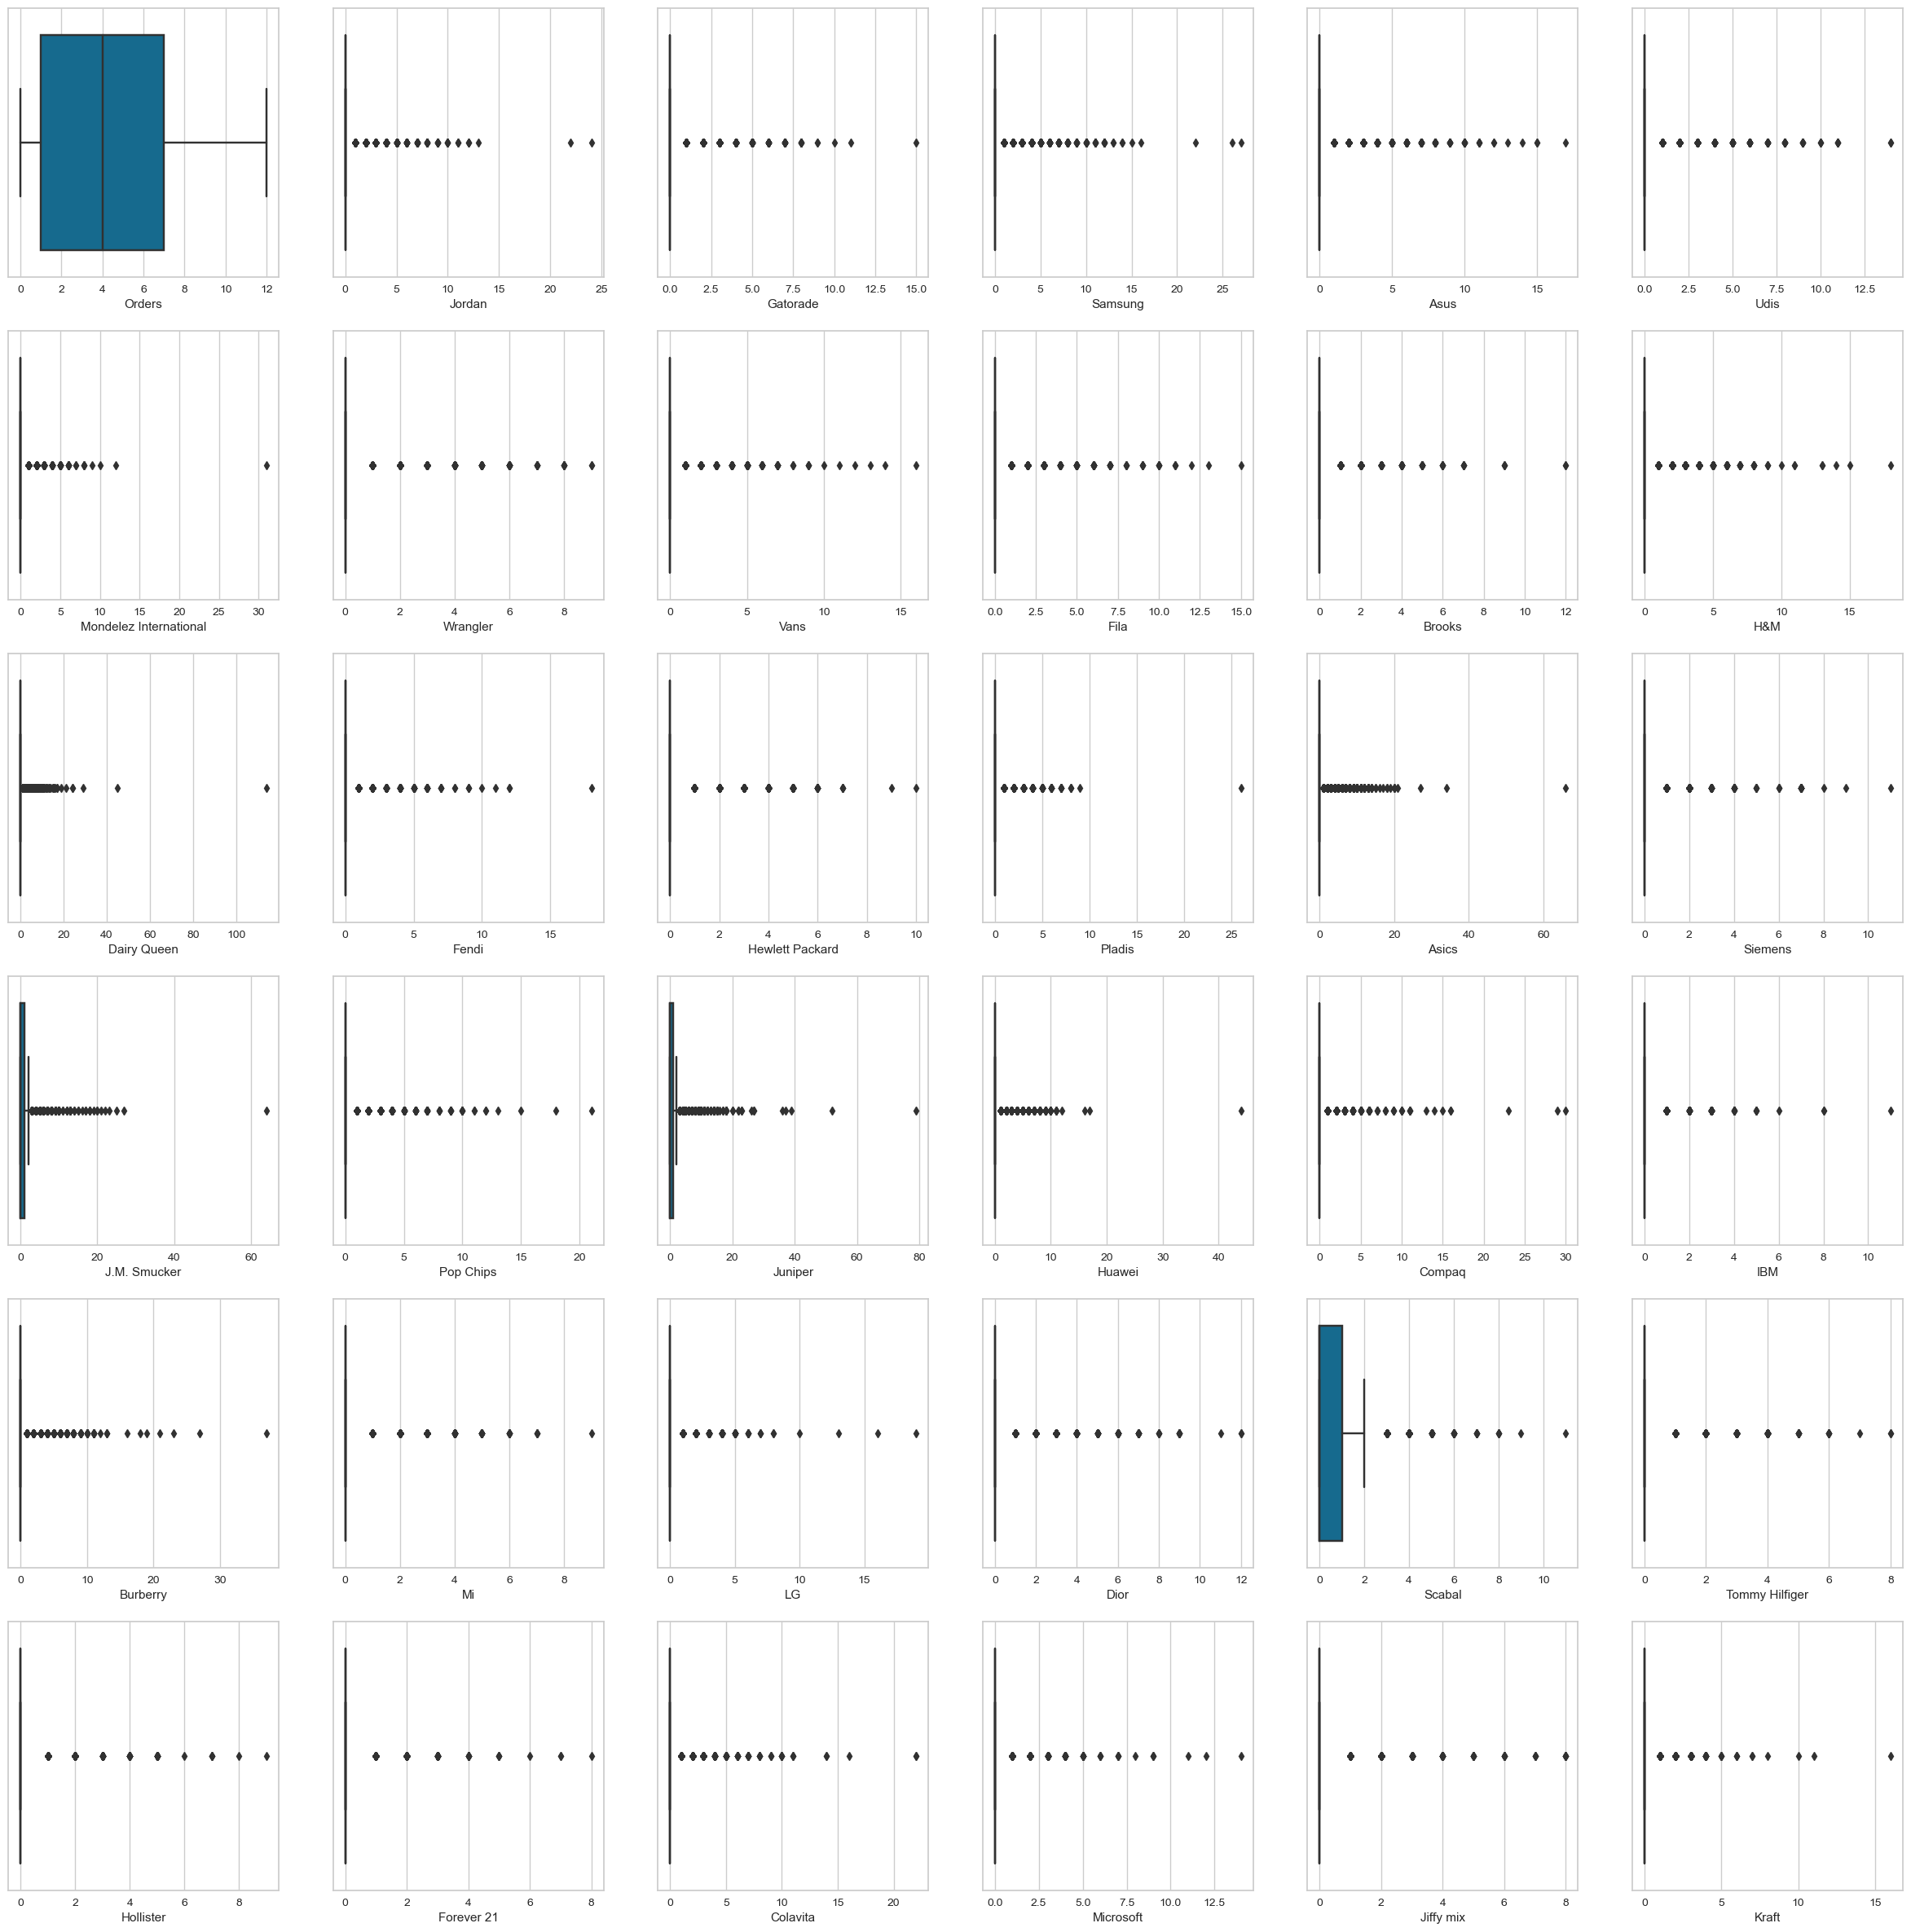

In [25]:
#Overall Box plot for the data
cols=list(df.columns[2:])
def dist_list(lst):
  plt.figure(figsize=(30,30))
  for i, col in enumerate(lst,1):
    plt.subplot(6,6,i)
    sns.boxplot(data=df,x=df[col])
dist_list(cols)

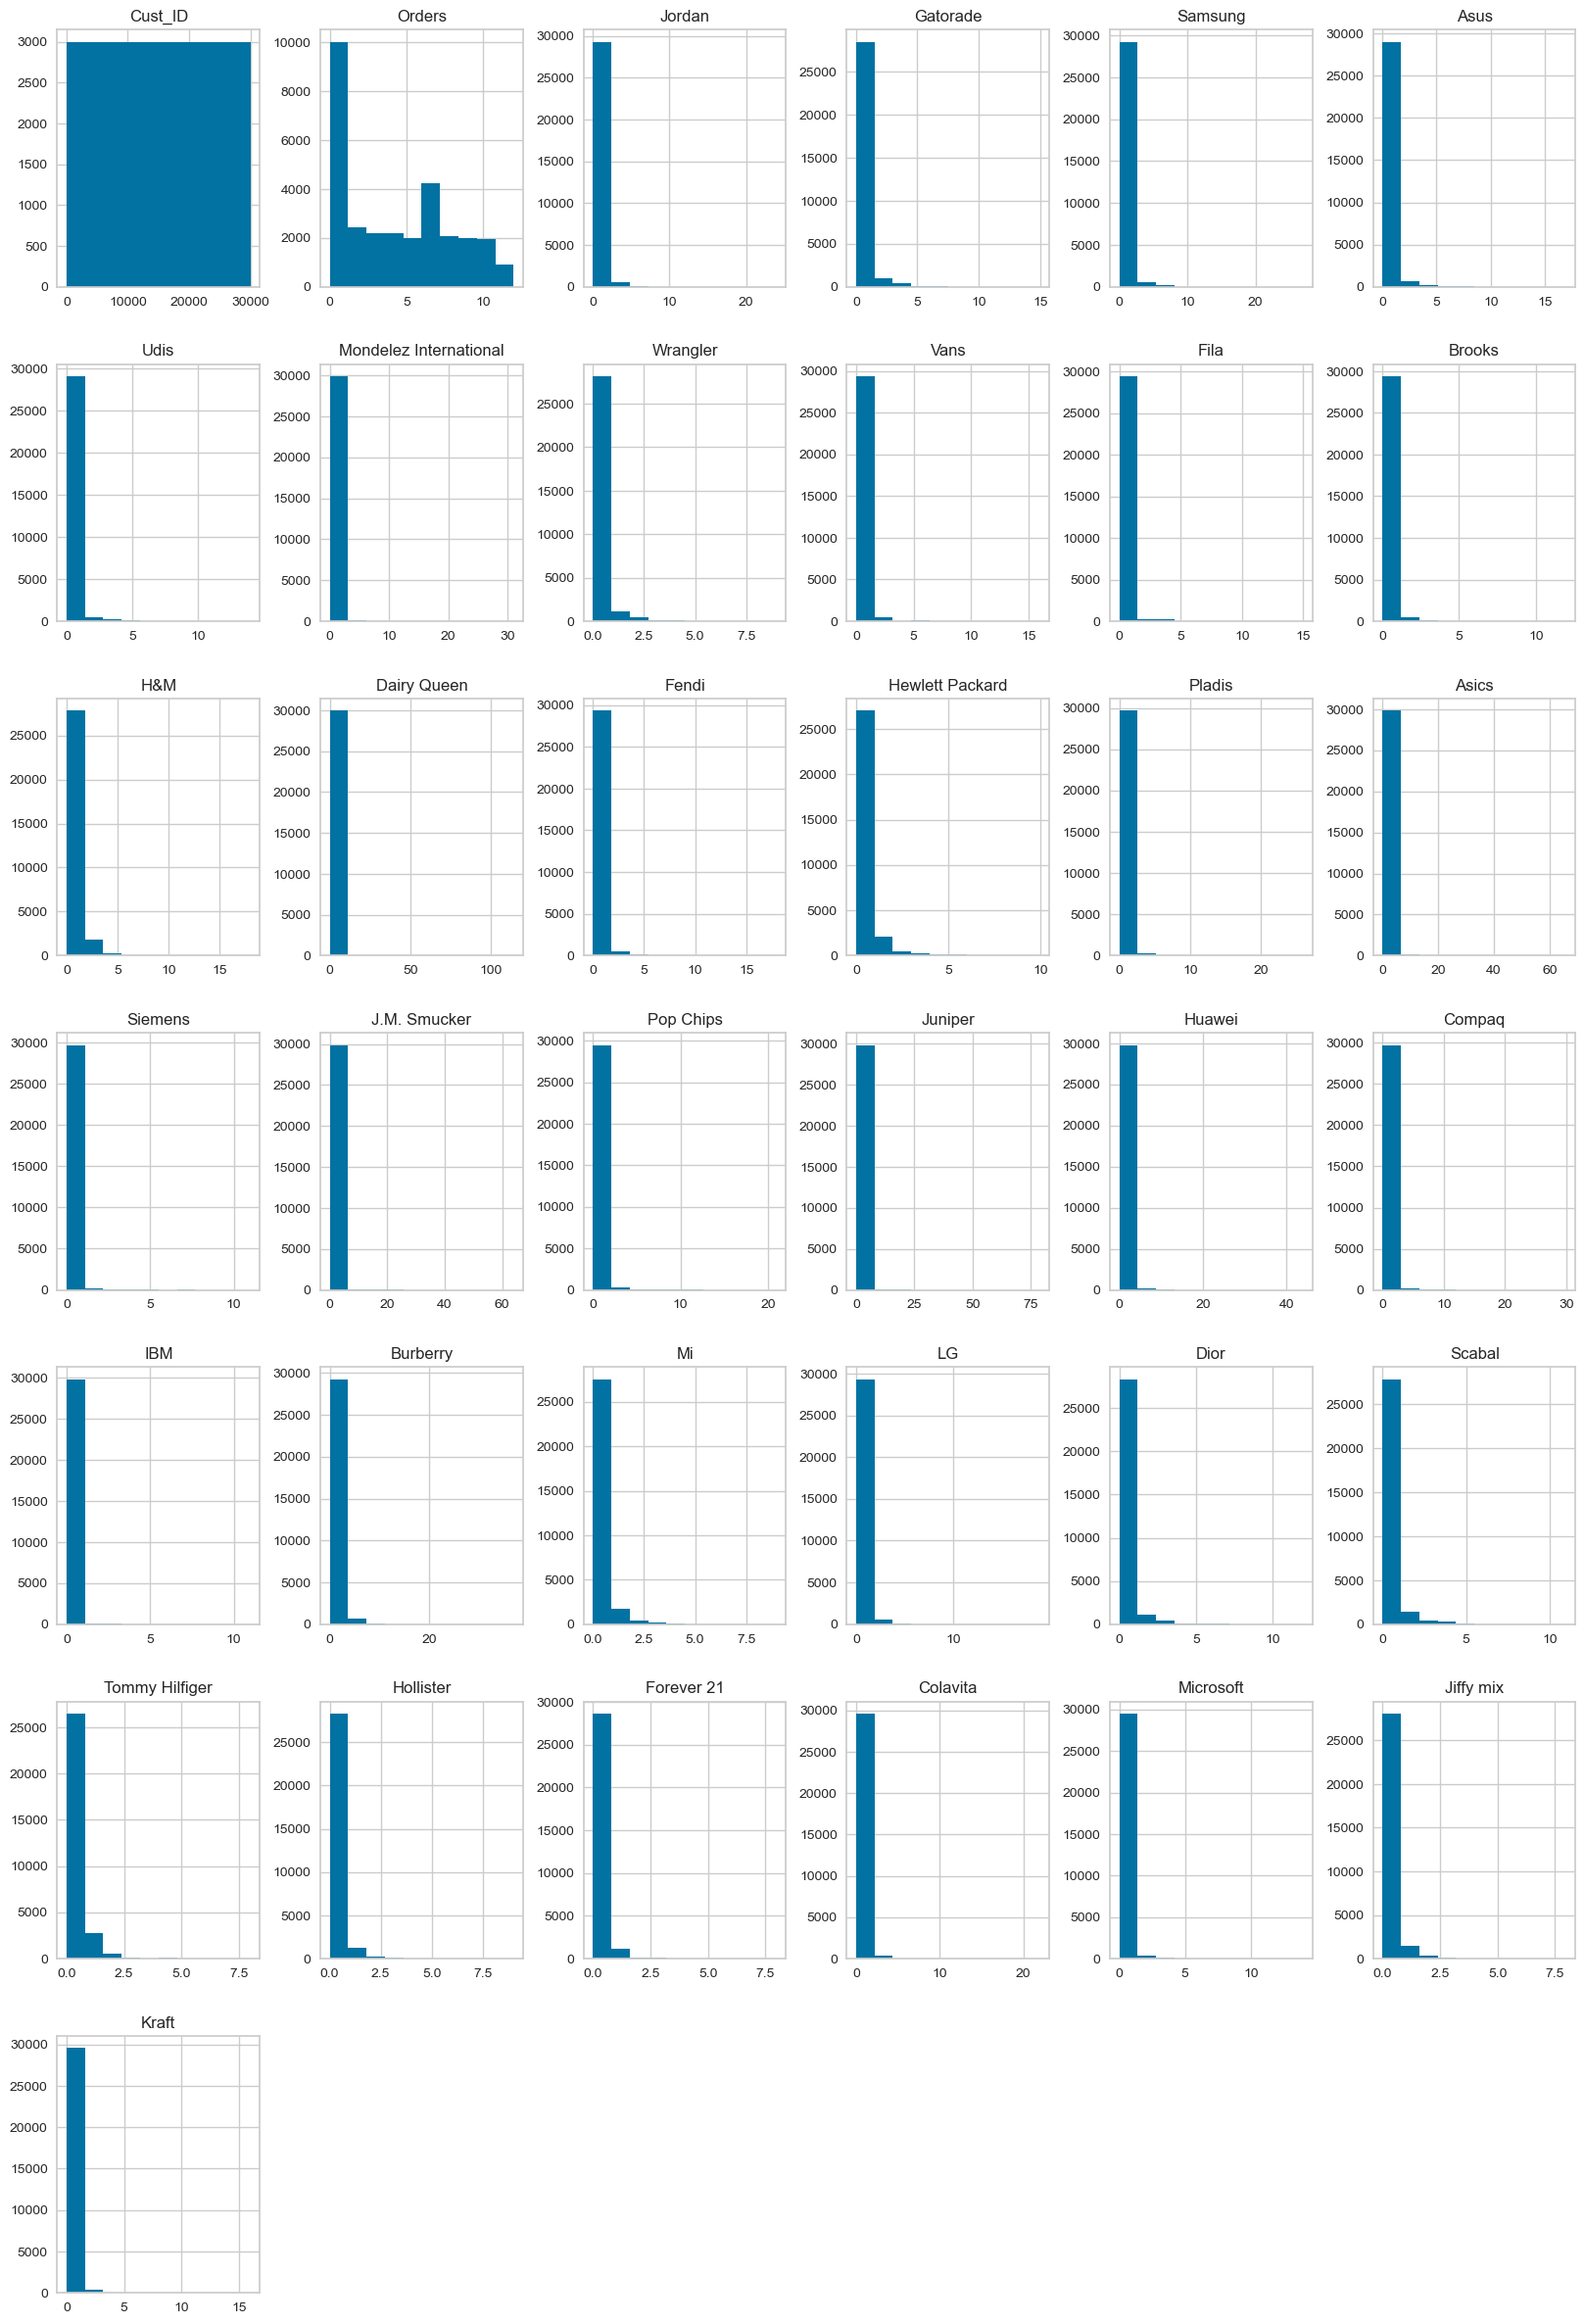

In [26]:
#Overall histogram of the data
df.hist(figsize=(20,30))
plt.show()

In [27]:
#To get a copy of the orginal dataset and creating a new column total search
new_df=df.copy()
new_df['Total Search']=new_df.iloc[:,3:].sum(axis=1)

In [28]:
#The total search column gives sum of rows along the columns starting from 3rd column
new_df['Total Search'] 

0         2
1        18
2         5
3         2
4        16
         ..
29995     1
29996     1
29997     2
29998     1
29999     5
Name: Total Search, Length: 30000, dtype: int64

In [29]:
#To sort the new df from high to low(decending order)
new_df.sort_values('Total Search', ascending=False)

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
9911,9912,F,2,0,11,0,0,0,0,6,...,2,8,4,9,1,4,1,3,6,160
24365,24366,F,2,3,3,2,2,0,1,2,...,2,2,6,4,1,4,3,3,2,136
4129,4130,F,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,127
888,889,F,0,2,1,3,2,0,1,3,...,3,1,5,3,2,5,1,3,4,109
15015,15016,F,10,2,2,2,0,0,0,0,...,0,1,0,0,1,7,4,2,2,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15000,15001,F,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
7247,7248,F,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7255,7256,M,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7259,7260,F,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


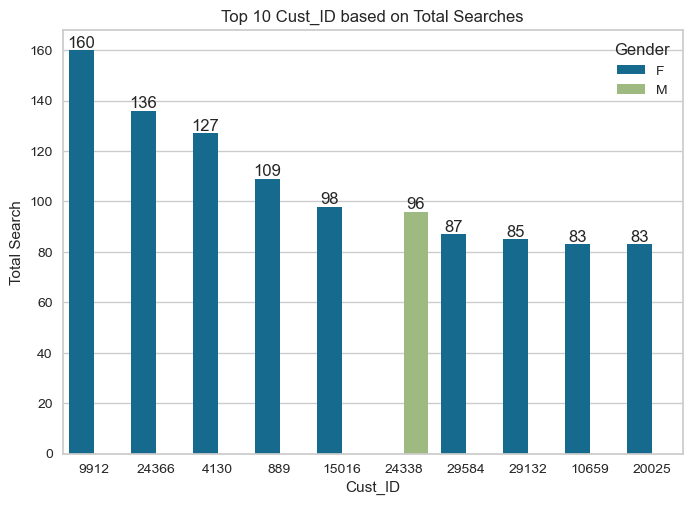

In [30]:
plt_data=new_df.sort_values('Total Search',ascending=False)[['Cust_ID','Gender','Total Search']].head(10)
d=sns.barplot(data=plt_data,
            x='Cust_ID',
            y='Total Search',
            hue='Gender',
            order=plt_data.sort_values('Total Search',ascending=False).Cust_ID)
for i in d.containers:
    d.bar_label(i,)
plt.title("Top 10 Cust_ID based on Total Searches")
plt.show()

# Scaling

In [31]:
#Extracting the columns for scalling
x=df.iloc[:,2:].values
x

array([[7, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [7, 0, 1, ..., 1, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [3, 2, 0, ..., 0, 0, 0]], dtype=int64)

In [32]:
#Scalling the columns using MinMax Scaler
scale=MinMaxScaler()
features=scale.fit_transform(x)
features

array([[0.58333333, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.06666667, ..., 0.        , 0.        ,
        0.        ],
       [0.58333333, 0.        , 0.06666667, ..., 0.07142857, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.06666667, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.25      , 0.08333333, 0.        , ..., 0.        , 0.        ,
        0.        ]])

# Data Modelling

In [33]:
#Use of Elbow method to get the optimal K value
inertia=[]
for i in range(1,16):
  k_means=KMeans(n_clusters=i)
  k_means=k_means.fit(features)
  inertia.append(k_means.inertia_)

C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

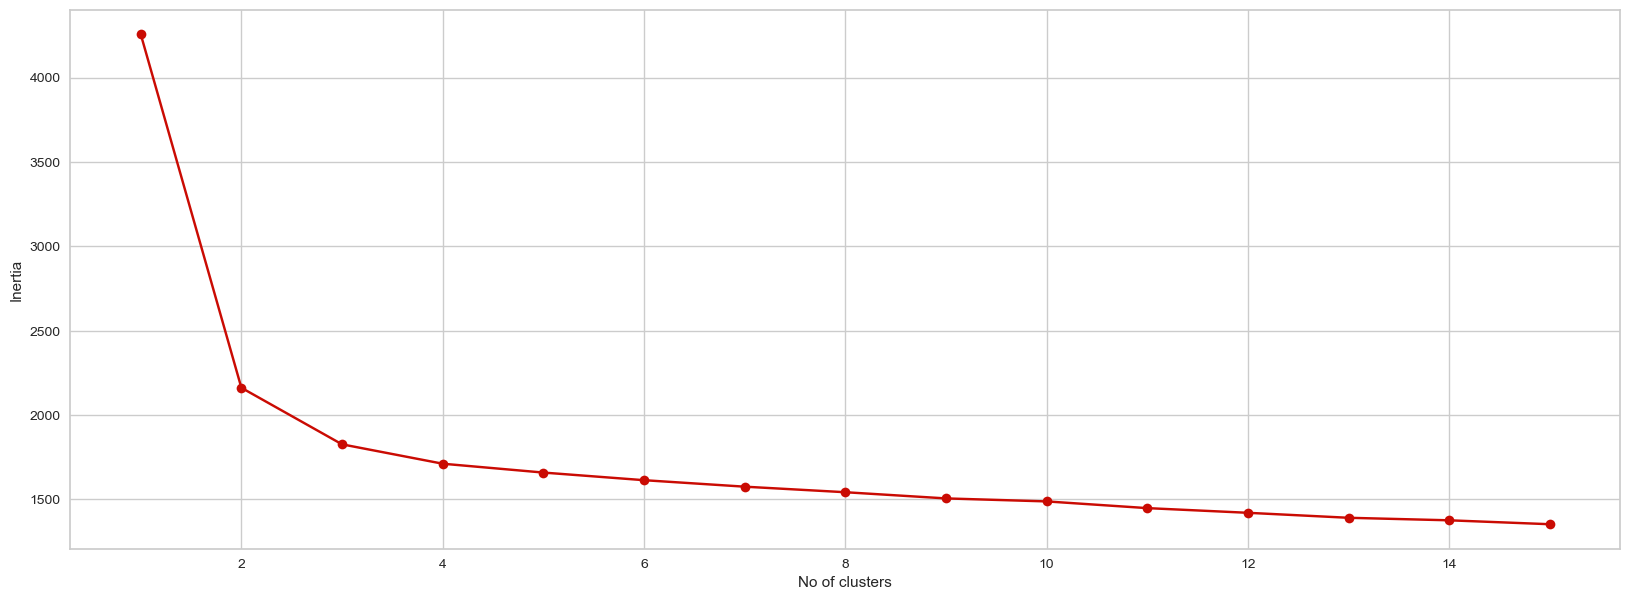

In [34]:
#Elbow graph
plt.figure(figsize=(20,7))
plt.plot(range(1,16),inertia, 'ro-')
plt.xlabel('No of clusters'),plt.ylabel('Inertia')
plt.show()

C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

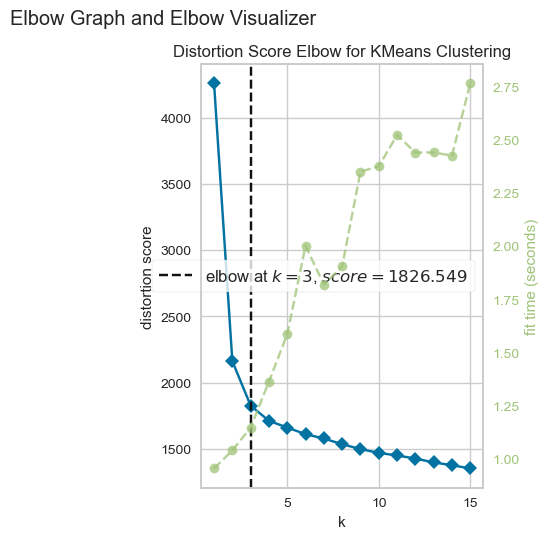

In [35]:
#Kelbow visualizer
plt.subplot(1,2,2)
kmeans=KMeans()
visualize=KElbowVisualizer(kmeans,k=(1,16))
visualize.fit(features)
plt.suptitle("Elbow Graph and Elbow Visualizer")
visualize.poof()
plt.show()

In [36]:
#Silhouette Score for each k value
silhouette_avg=[]
for i in range(2,16):
  #initialize kmeans cluster
  kmeans=KMeans(n_clusters=i)
  cluster_labels=kmeans.fit_predict(features)
  #Silhouette score
  silhouette_avg.append(silhouette_score(features,cluster_labels))

C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

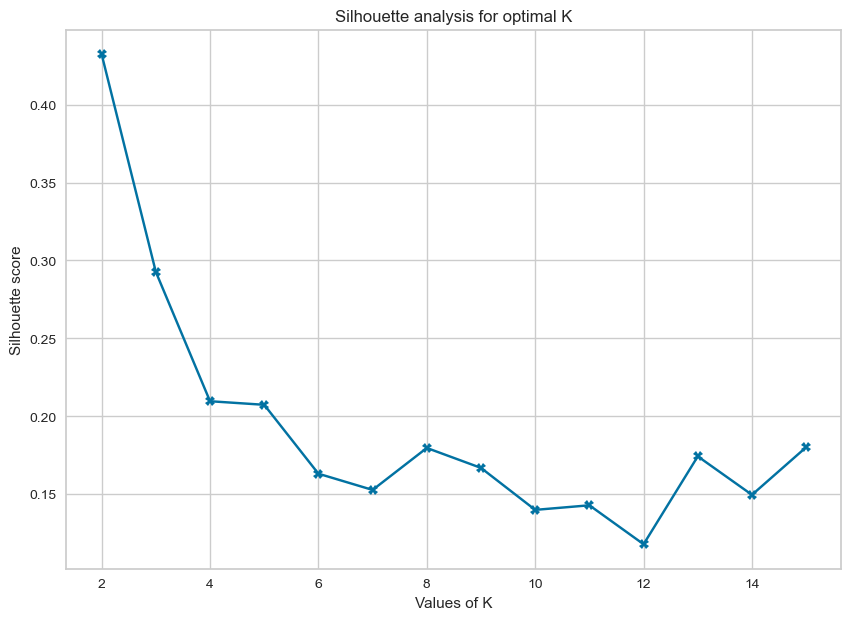

In [37]:
plt.figure(figsize=(10,7))
plt.plot(range(2,16),silhouette_avg, 'bX-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis for optimal K')
plt.show()

In [38]:
#To find centroids of the 3 clusters
model=KMeans(n_clusters=3)
model=model.fit(features)

C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [39]:
#To assign the cluster Labels
y_km=model.predict(features)
centers=model.cluster_centers_

In [40]:
#To create a new dataframe using cluster labels predicted by the KMeans model
df['Cluster']=pd.DataFrame(y_km)
df.to_csv("Cluster_data", index=False)

In [41]:
#To view the value count of each clusters
df["Cluster"].value_counts()

Cluster
1    12432
2     9128
0     8440
Name: count, dtype: int64

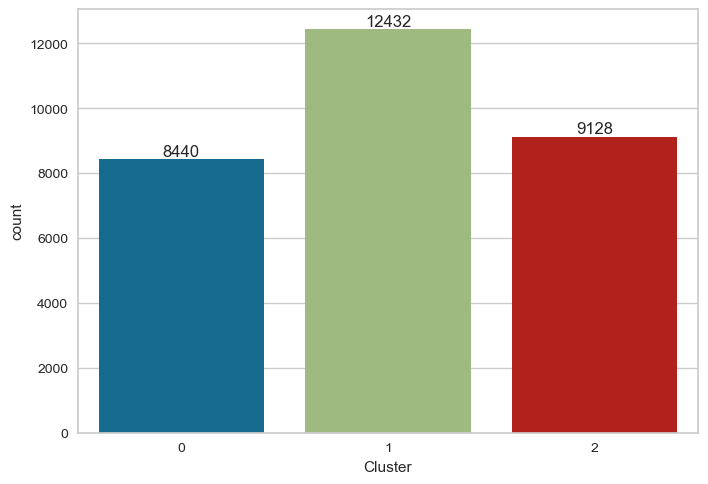

In [42]:
#To view the value count of each clusters graphically
e=sns.countplot(data=df,x='Cluster')
for i in e.containers:
    e.bar_label(i,)
plt.show()

In [43]:
c_df=pd.read_csv("Cluster_data")
c_df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Cluster
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,2,F,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,F,10,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,2


In [44]:
c_df["Total Search"]=c_df.iloc[:,3:38].sum(axis=1)
c_df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Cluster,Total Search
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
1,2,F,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,18
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,2,5
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
4,5,F,10,0,0,0,0,0,0,0,...,2,0,0,0,0,0,1,1,2,16


# Analyze the cluster 0

In [45]:
cl_0=c_df.groupby(['Cluster','Gender'], as_index=False).sum().query('Cluster==0')
cl_0

,Cluster,Gender,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
0,0,F,106470376,30755,1923,1603,1725,1414,1185,1108,...,2039,3092,1196,649,463,1335,865,665,491,51550
1,0,M,21374453,6894,521,748,321,22,55,147,...,246,104,117,56,41,294,193,110,110,8543


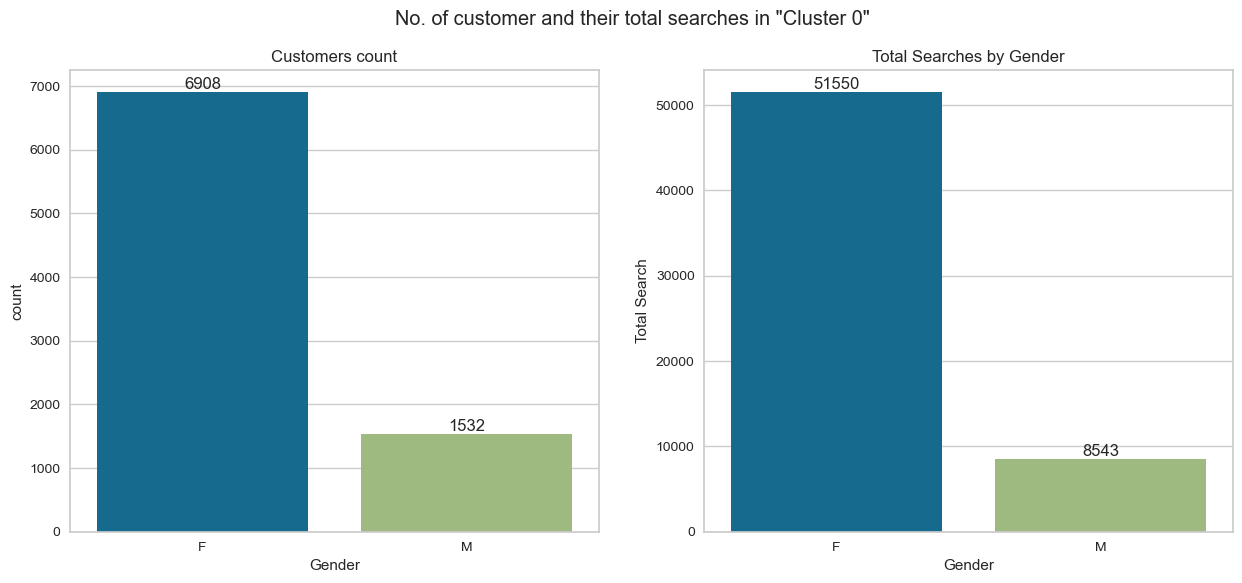

In [46]:
#To visualize the cluster 0
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
f1=sns.countplot(data=c_df.query('Cluster==0'),x='Gender')
for i in f1.containers:
    f1.bar_label(i,)
plt.title('Customers count')

plt.subplot(1,2,2)
f2=sns.barplot(data=cl_0,x='Gender',y='Total Search')
for i in f2.containers:
    f2.bar_label(i,)
plt.title('Total Searches by Gender')
plt.suptitle('No. of customer and their total searches in "Cluster 0"')
plt.show()

# Analyze the cluster 1

In [47]:
cl_1=c_df.groupby(['Cluster','Gender'], as_index=False).sum().query('Cluster==1')
cl_1

,Cluster,Gender,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
2,1,F,154699357,6269,2470,1947,2086,1813,1632,1480,...,3041,4194,1807,847,654,1960,1153,870,776,70690
3,1,M,28245384,1291,601,777,435,12,75,162,...,283,175,172,83,55,386,186,160,142,10787


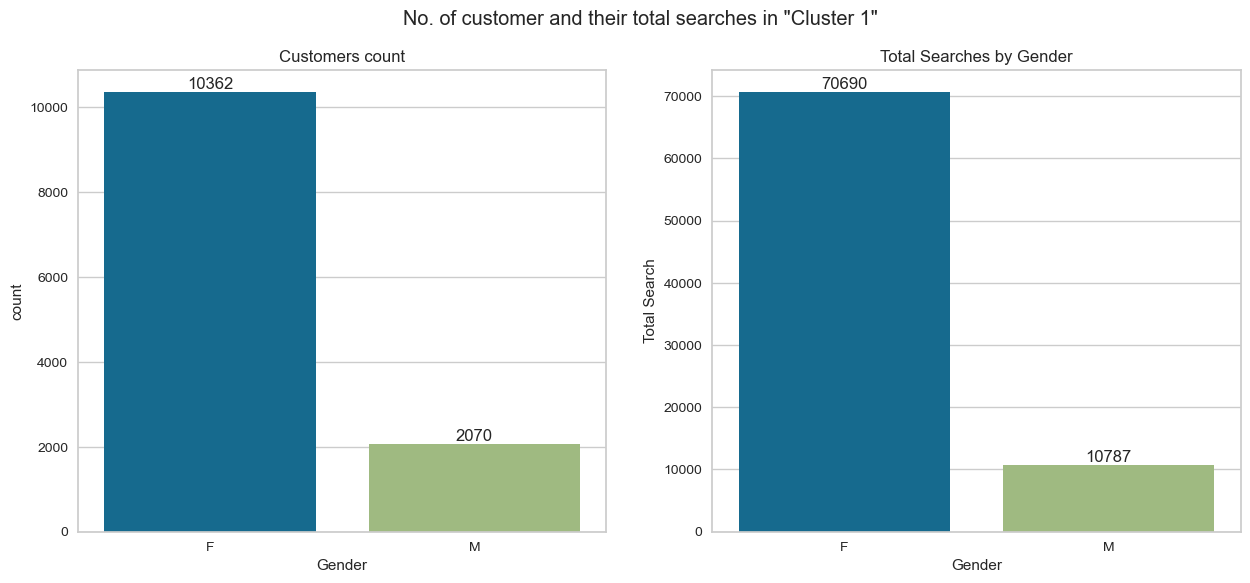

In [48]:
#To visualize the cluster 1
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
g1=sns.countplot(data=c_df.query('Cluster==1'),x='Gender')
for i in g1.containers:
    g1.bar_label(i,)
plt.title('Customers count')

plt.subplot(1,2,2)
g2=sns.barplot(data=cl_1,x='Gender',y='Total Search')
for i in g2.containers:
    g2.bar_label(i,)
plt.title('Total Searches by Gender')
plt.suptitle('No. of customer and their total searches in "Cluster 1"')
plt.show()

# Analyze the cluster 2

In [49]:
cl_2=c_df.groupby(['Cluster','Gender'], as_index=False).sum().query('Cluster==2')
cl_2

,Cluster,Gender,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
4,2,F,116501910,65606,1982,1678,1780,1565,1308,1145,...,2241,3440,1322,605,465,1465,918,713,510,55251
5,2,M,22723520,14279,526,817,341,14,51,151,...,284,97,155,90,42,326,176,123,98,9322


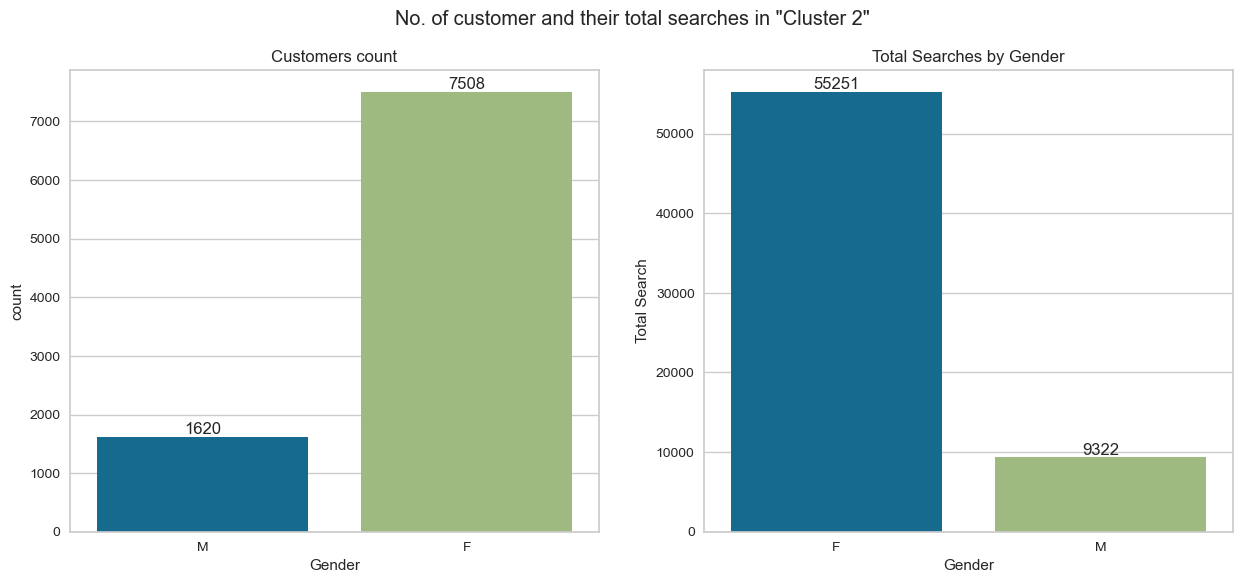

In [50]:
#To visualize the cluster 2
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
h1=sns.countplot(data=c_df.query('Cluster==2'),x='Gender')
for i in h1.containers:
    h1.bar_label(i,)
plt.title('Customers count')

plt.subplot(1,2,2)
h2=sns.barplot(data=cl_2,x='Gender',y='Total Search')
for i in h2.containers:
    h2.bar_label(i,)
plt.title('Total Searches by Gender')
plt.suptitle('No. of customer and their total searches in "Cluster 2"')
plt.show()

# Overall Analysis

In [51]:
#Overall Summary of all Cluster
final_df=c_df.groupby(['Cluster'],as_index=False).sum()
final_df

,Cluster,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
0,0,127844829,FFFFFFFFFFMMFMFMFFFFFFFFFFFFMFFFMFFFFFFFFFMFFF...,37649,2444,2351,2046,1436,1240,1255,...,2285,3196,1313,705,504,1629,1058,775,601,60093
1,1,182944741,FFFFFFFFMFFMFFFFFFFFFFFFFFFFFFFFFFMFMMMFFFFFFF...,7560,3071,2724,2521,1825,1707,1642,...,3324,4369,1979,930,709,2346,1339,1030,918,81477
2,2,139225430,MMFMFFFFMFMMFFMFMFMFFFMFMFMMFFFFFFFFFFFFFFFFFF...,79885,2508,2495,2121,1579,1359,1296,...,2525,3537,1477,695,507,1791,1094,836,608,64573


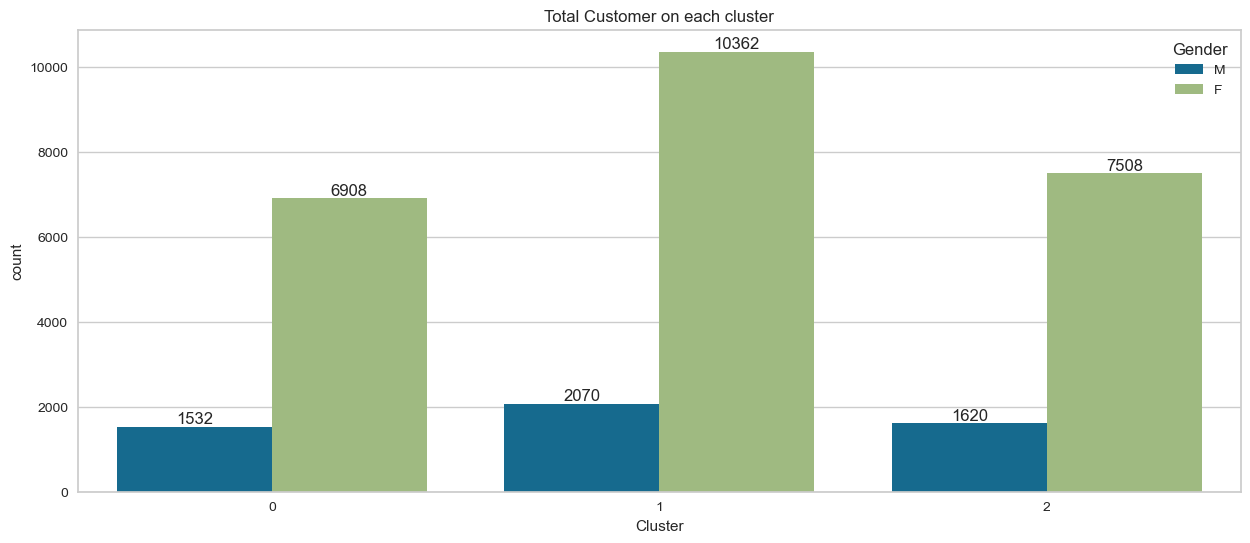

In [52]:
#To visualize the summary of all clusters
plt.figure(figsize=(15,6))
x=sns.countplot(data=c_df,x='Cluster',hue='Gender')
for i in x.containers:
    x.bar_label(i,)
plt.title('Total Customer on each cluster')
plt.show()

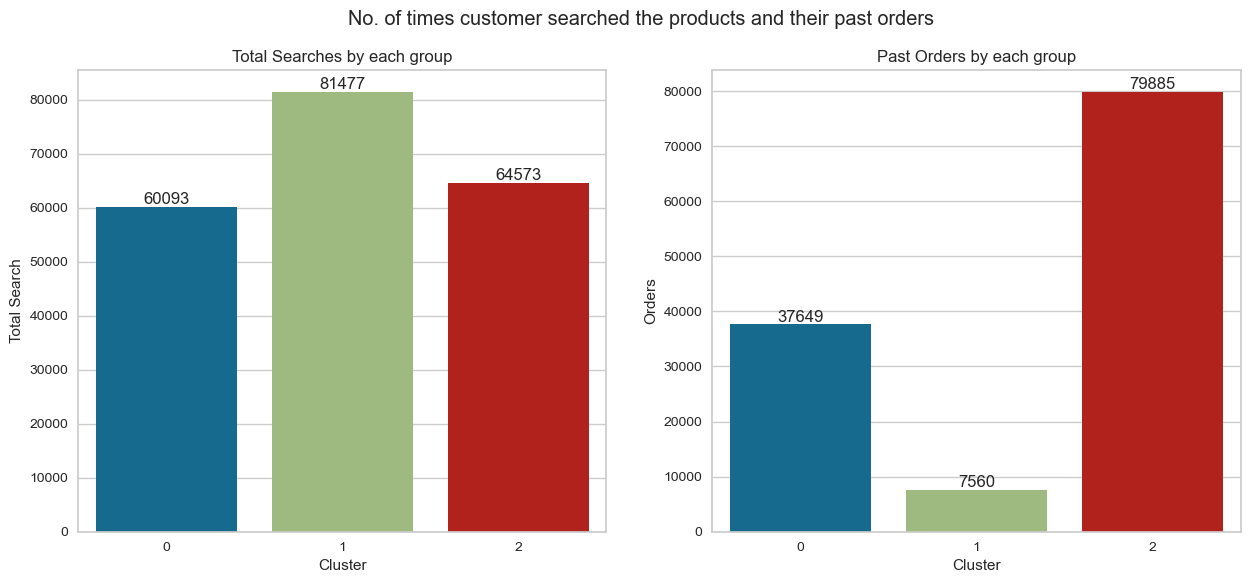

In [53]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
y1=sns.barplot(data=final_df,x='Cluster',y='Total Search')
for i in y1.containers:
    y1.bar_label(i,)
plt.title('Total Searches by each group')
 
plt.subplot(1,2,2)
y2=sns.barplot(data=final_df,x='Cluster',y='Orders')
for i in y2.containers:
    y2.bar_label(i,)
plt.title('Past Orders by each group')
plt.suptitle('No. of times customer searched the products and their past orders')
plt.show()